In [2]:
#Import required libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:')


Your manager doesn’t know much about analytics. That is too bad, but don’t worry, you’ll have his 
job  soon  enough.  In  the  meantime,  he  has  made  the  following  comments.  Here  are  your  tasks  for  
each of the below quotes: Identify whether his suggestions /comments are good or bad.  
o If they are good, explain why. 
o If they are bad, explain why and what you should do to fix them or make them better. Make sure your answer demonstrates that you have a sophisticated understanding of the issues 
involved.

1. a. “Ten percent of our customers did not complete a satisfaction survey. We can get most of their 
demographic information from an existing database, so we decided to complete our analysis 
substituting in the average response from other people for any missing values.”  
	bad 
	•	Missing Not at Random (MNAR): The fact that 10% of customers did not complete a satisfaction survey might be related to their level of satisfaction or dissatisfaction. For example, very dissatisfied or very satisfied customers might be less likely to respond, skewing the average responses if their data is not captured authentically.


b. I was running a regression model – variable X1 worked fine until I added X2, then neither were 
significant, so I took X2 back out and left X1 by itself. 

	bad

	•	Ignoring Multicollinearity: When adding a variable X2 affects the significance of another variable X1, it often suggests the presence of multicollinearity—where X1 and X2 are highly correlated. Removing X2 without understanding why it impacts X1 could lead to a model that is biased or misses important explanatory power provided by X2.
	•	Model Robustness and Causality Misinterpretation: Simply removing X2 because it makes X1 insignificant could be oversimplifying the model. This approach might ignore deeper relationships and interactions between variables, potentially leading to erroneous conclusions about causality and effects.

    Suggested Improvement

	1.	Investigate Multicollinearity:
	•	Correlation Analysis: Check the correlation between X1 and X2. If the variables are highly correlated, consider methods to address this, like PCA (Principal Component Analysis) or partialling out the effect of one variable.
	•	Variance Inflation Factor (VIF): Calculate VIF to quantify the severity of multicollinearity. A VIF value greater than 5 is often considered indicative of problematic multicollinearity.


c. “The R-squared of a regression is generally a good indicator of how well the overall model fits 
the data.” 

	Quality of Suggestion: Good.

	Reason:

	•	Surface Level Validity: On the surface, R-squared does measure the proportion of variance in the dependent variable that is predictable from the independent variables. It gives an intuitive measure of how much of the variability in the response data can be explained by the model. This makes it a useful statistic in many contexts.
	•	Limitations and Misinterpretations: R-squared alone does not tell the whole story about the effectiveness of a regression model. It has several limitations and can be misleading if interpreted in isolation.

    By understanding and using R-squared in conjunction with other analytical methods and metrics, you can develop a more accurate and comprehensive view of your model’s performance and its ability to predict or explain new data. This holistic approach to model evaluation will lead to more robust and reliable analytical insights.





	d.  “When developing a model from theory, it doesn’t matter whether you start with a small model 
	and build up, or a large model and build down, you get to the same place – somewhere in the 
	middle – either way.”  

	Quality of Suggestion: Partially Good, but Mostly Problematic.

	Reason:

		•	Flexibility in Approach: It’s true that both approaches—starting with a simple model and adding variables (forward selection), or starting with a full model and removing variables (backward elimination)—are valid methods in statistical modeling. Both aim to balance complexity and explanatory power.
		•	Potential for Different Outcomes: However, the assumption that both approaches lead to the same model is optimistic and not always accurate. The path taken can influence the final model due to differences in how significance, multicollinearity, and interaction effects are handled during the model-building process.

	Limitations of the Comment

		1.	Different Results Due to Statistical Nuances: Forward selection and backward elimination can lead to different final models because each step’s decisions depend on the current model’s state. For example, a variable that seems insignificant in a larger set might prove significant when fewer predictors are competing.
		2.	Overfitting vs. Underfitting: Starting with too many variables might lead to an overfitted model, especially if not all variables are theoretically justified. Conversely, starting with too few might miss important predictors, leading to an underfitted model.
		3.	The Role of Model Assumptions: The development path might affect how well model assumptions (like linearity and independence of errors) hold, impacting model validity and generalizability.

	Suggested Improvement

		1.	Theory-Driven Model Development: Begin with a model based on theoretical or domain knowledge rather than purely statistical criteria. This helps ensure that the variables included have a logical basis for their inclusion.
		2.	Use Both Approaches in Parallel: To ascertain the robustness of the model, it might be useful to explore both forward and backward methods to see if they converge on a similar model. If they diverge, understanding why can provide deeper insights.
		3.	Incorporate Cross-Validation: Regardless of the starting point, use cross-validation to assess the model’s predictive performance on unseen data, which helps in mitigating the risks of overfitting.
		4.	Consider Model Complexity and Parsimony: Use information criteria like AIC or BIC, which penalize excessive model complexity, to help in deciding on the final model. These criteria can guide the addition or removal of variables in a more objective manner.
		5.	Regularization Techniques: Employ regularization methods (like Lasso or Ridge) that can shrink coefficients or reduce them to zero, effectively performing variable selection during the estimation process.

	By addressing these points, you can ensure that the model development process is both rigorous and theoretically justified, leading to a more reliable and effective model.



2. Many university and college students work during their summer vacations.  One particular school was 
very interested in understanding student employment prospects.  To develop insights, a confidential 
survey was conducted for second-year students and that data was linked to records on their academic 
performance and other demographic information for those who worked in the summer.  
You have been hired by the school’s principal to analyze the data.   In general he would like you to 
analyze student earnings in terms of their grade performance and demographic characteristics.  He 
has provided you with a list of questions below that he would like to have answered by your analysis.  
For each question, he would like you to do whatever analysis is required to answer the questions 
and provide an explanation in language he is likely to understand.  He encourages you to read all of 
the parts of the question first. 


a. Develop a model of student earnings based on the data on tab ‘Students’.  Explain why you 
chose the model you did and what the results tell you. 

In [47]:
#Importing Data
db_dir = os.getcwd()
db_dir = db_dir + '/data/MMA_860_Final_Practice_Data_vf.xlsx'
data = pd.read_excel(db_dir, sheet_name='Students')

from sklearn.linear_model import LinearRegression

train_X = data[['Age','N_Summers_Worked','Grade_Calculus','Grade_English','Grade_Accounting','Grade_OB']].values
train_y = data['Earnings'].values			
reg = LinearRegression().fit(train_X, train_y)

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Earnings ~ Age + N_Summers_Worked + Grade_Calculus + Grade_English + Grade_Accounting + Grade_OB',data).fit()
print(model.summary())

# The decrease in R-squared after removing variables with high p-values is a common observation. R-squared measures the proportion of variance in the dependent variable that is predictable from the independent variables. When you remove variables, regardless of their p-values, you’re likely to explain less of the variance unless those variables were entirely irrelevant or redundant. Here’s how you can address this situation:

# Understanding the Impact of Variable Removal

# 	1.	R-squared Decrease: Even if the variables were not statistically significant, they might still carry some information that contributes to explaining the variance in earnings. Removing them reduces the complexity of the model, which can sometimes make the model less fit to capture subtle nuances in your data.
# 	2.	Adjusted R-squared: It’s crucial to look at the adjusted R-squared rather than just R-squared when removing variables. Adjusted R-squared adjusts for the number of variables in the model, providing a more accurate measure of model performance, especially in the context of model simplification.
# 	3.	Trade-offs: There’s always a trade-off between model simplicity and explanatory power. A simpler model (fewer variables) is easier to understand and less likely to overfit, but it may have less predictive power.


                            OLS Regression Results                            
Dep. Variable:               Earnings   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     35.96
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           3.35e-22
Time:                        20:20:49   Log-Likelihood:                -753.22
No. Observations:                 100   AIC:                             1520.
Df Residuals:                      93   BIC:                             1539.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1765.7339   1494.769  

In [30]:
model = ols('Earnings ~ N_Summers_Worked + Grade_Calculus + Grade_Accounting',data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Earnings   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     68.56
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           8.85e-24
Time:                        20:12:25   Log-Likelihood:                -755.97
No. Observations:                 100   AIC:                             1520.
Df Residuals:                      96   BIC:                             1530.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3071.3095    402.533  

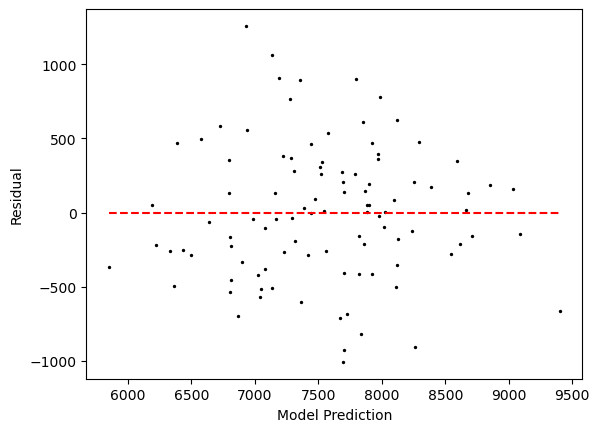

{'LM Statistic': 2.033270193824943, 'LM-Test p-value': 0.5655301463179954, 'F-Statistic': 0.6641504348581097, 'F-Test p-value': 0.5760956420622918}
R-Squared on Test Data: 0.6987910582717095
Mean Squared Error on Test Data: 204140.82825017723


In [48]:
# b. Is  heteroskedasticity  an  issue  with  this  model?    Regardless  of  your  findings,  assume  that  heteroskedasticity is not an issue for the balance of your analysis. 

import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Assuming 'model' is the fitted OLS model from statsmodels
residuals = model.resid
predictions = model.fittedvalues

model = ols('Earnings ~ N_Summers_Worked + Grade_Calculus + Grade_Accounting',data).fit()

#Testing for heteroskasticity 

#Residuals calculated by definition above.
predicted_y = reg.predict(train_X)
#Note we can perform element-wise subtraction between arrays like so
residuals = train_y - predicted_y

import matplotlib.pyplot as plt
plt.scatter(predicted_y,residuals,s=2,c='black')

#This line adds the dashed horizontal line
plt.hlines(0,min(predicted_y),max(predicted_y),color='red',linestyles='dashed')

plt.xlabel("Model Prediction")
plt.ylabel("Residual")
plt.show()

#Perform the Breuch-Pagan Test by running this line
bp = het_breuschpagan(model.resid,model.model.exog)
measures = ('LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value')
print(dict(zip(measures,bp)))


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Predictions on the test set
y_pred_test = reg.predict(train_X)

# Evaluating the model on the test data
r_squared_test = r2_score(train_y, y_pred_test)
mse_test = mean_squared_error(train_y, y_pred_test)

print("R-Squared on Test Data:", r_squared_test)
print("Mean Squared Error on Test Data:", mse_test)

# Residual Plot Results

# Observations from the Residual Plot

# 	1.	Spread of Residuals: The residuals do not show a clear pattern of increasing or decreasing spread as the model predictions increase. Ideally, in a homoscedastic dataset, the spread or variability of residuals should be roughly constant across all levels of predictions.
# 	2.	Presence of Outliers: There are a few points that lie far from the main cluster of residuals. While these outliers don’t necessarily indicate heteroskedasticity, they can influence the overall assessment and might need further investigation to determine their impact on the regression analysis.
# 	3.	Horizontal Line: The dashed horizontal line at zero helps visualize the central tendency of the residuals. Most residuals appear to cluster around this line without systematic patterns deviating from it as predictions change, which is a good sign.

# Signs of Heteroskedasticity

# 	•	No Apparent Funnel Shape or Pattern: There is no apparent funnel shape or clear pattern that would typically indicate heteroskedasticity, where the variance of residuals increases or decreases with the predicted values.
# 	•	Random Scatter: The random scatter of residuals around the prediction line suggests that the variance is not changing systematically across the range of predictions, which is indicative of homoscedasticity.

# Breusch-Pagan Test Results

# 	•	Breusch-Pagan Test: The p-value of the Breusch-Pagan test is approximately 0.576, which is above the common alpha level of 0.05. This means you fail to reject the null hypothesis of homoscedasticity. According to this test, there is not enough evidence to suggest that heteroskedasticity is a problem in your model.

	# •	No Clear Evidence of Heteroskedasticity: Both the visual and statistical tests indicate that heteroskedasticity may not be a significant issue in this model. The residuals do not show a clear pattern of variance, and the statistical test supports this observation.
	# •	Continuing Analysis: As per your instructions to assume that heteroskedasticity is not an issue, you can proceed with further analysis without making adjustments for heteroskedasticity, such as using heteroskedasticity-consistent standard errors or transforming the model.



c. The principal claims that summer earnings increase as grades in calculus increase.  If so, he 
would like to offer free tutoring support to students to increase their calculus grades so that 
they will earn more.  Does the evidence support the existence of such a relationship?  If such 
a relationship existed, would it justify his strategy? 

To assess the claim that summer earnings increase as grades in calculus increase, we need to look at the coefficient of the calculus grades variable from the regression model. According to your model results, the coefficient for "Grade_Calculus" is significantly positive (coefficient = 35.0583, p-value = 0.000). This suggests a statistically significant relationship where higher calculus grades are associated with higher earnings.

### Evidence Supporting the Relationship

- **Statistical Significance**: The coefficient for calculus grades is positive and highly significant, indicating that as calculus grades increase, so do earnings. This statistically supports the principal's claim.
- **Magnitude of Impact**: The magnitude, a $35.06 increase in earnings for each one-point increase in calculus grade, suggests a practical significance, especially over the typical range of grade variation.

### Justifying the Strategy

If such a relationship exists and is believed to be causal, then improving calculus grades through free tutoring could theoretically lead to higher earnings. However, before implementing such a strategy, consider the following:

1. **Causality vs. Correlation**: The key question is whether higher calculus grades cause higher earnings or if they are merely correlated due to other underlying factors (like overall academic ability, work ethic, or field of study that may also relate to higher-paying summer jobs). The regression analysis alone does not establish causality.

2. **Costs vs. Benefits**: The principal would need to evaluate the cost of providing free tutoring and weigh it against the potential increase in student earnings. This analysis should include the number of students likely to use the service, the cost of hiring tutors, and the expected increase in earnings.

3. **Generalizability**: The findings are based on this particular dataset and student body. Before generalizing this strategy to other contexts or over different time periods, it would be prudent to validate these results further.

4. **Alternative Strategies**: Consider whether there are more cost-effective or impactful ways to achieve similar outcomes. For instance, improving educational outcomes more broadly or supporting other skills that are also highly valued in the job market.

### Conclusion

The evidence from your regression model supports the principal's claim that higher calculus grades are associated with higher summer earnings. If the principal believes that the observed relationship could be causal, and if the costs of tutoring are justified by the potential earnings increase, then his strategy could be deemed reasonable.

However, before proceeding, it is advisable to conduct further analysis to establish causality and to perform a detailed cost-benefit analysis to ensure the financial viability and overall effectiveness of the tutoring program. Additionally, exploring other factors that could influence earnings and considering broader educational initiatives could provide more holistic benefits to students.

In [63]:
# d. Is  there  evidence  of  any  difference  in  performance  between  male  and  female  students  in  
# terms of the relationship between at least some of their grades and their summer earnings?
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Adding interaction terms between Gender and Grade variables
data1 = pd.get_dummies(data, columns=['Gender']) 

# data1
model_with_interactions = ols( 'Earnings ~ Age + N_Summers_Worked + Grade_Calculus + Grade_English + Grade_Accounting + Grade_OB + Gender_M + Gender_F + Gender_M:Grade_Calculus + Gender_M:Grade_English + Gender_M:Grade_Accounting + Gender_M:Grade_OB + Gender_F:Grade_Calculus + Gender_F:Grade_English + Gender_F:Grade_Accounting + Gender_F:Grade_OB', data=data1).fit()

print(model_with_interactions.summary())

# there is evidence that there is significance between male and the grade they got in english and Calculus to influence there summer earnings

                            OLS Regression Results                            
Dep. Variable:               Earnings   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     21.42
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           2.03e-20
Time:                        20:23:20   Log-Likelihood:                -748.11
No. Observations:                 100   AIC:                             1520.
Df Residuals:                      88   BIC:                             1551.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

3. A Kingston real estate company believes that the most important factor in selling a house is setting 
the initial price correctly.  This company has hired you as a consultant to develop a model to predict 
housing prices so they can set initial prices accordingly.  A collection of data has been provided to you 
on  the  tab  ‘housing’.    The  client  insists  that  the  model  should  include  all  the  explanatory  variables  
they have provided: Price = B0 + B1 N_Bedrooms + B2 N_Bathrooms + B3 House_Size + B4 Age + B5 
Renovated_Kitchen + B6 Finished_Basement + B7 Close_to_Campus.  


a. In principle, how would you look for outliers in the data?  If you found any how would you 
recommend that the client deal with them? Note: you do not need to actually do anything for 
this question – there are no outliers in the data. 

	1.	Visual Inspection:
	•	Box Plots: These are especially useful for quickly visualizing where the bulk of data lies and identifying points that fall far outside the common range. Each variable (e.g., N_Bedrooms, House_Size) can be plotted separately.
	•	Scatter Plots: Useful for detecting outliers in the context of two variables (e.g., House_Size vs. Price). This can help identify anomalies that are not evident when examining a single variable.

    2.	Statistical Methods:
	•	Z-Scores: Calculate the Z-scores of the data points, which indicate how many standard deviations a point is from the mean. Points with a Z-score greater than 3 or less than -3 are typically considered outliers.
	•	Interquartile Range (IQR): The IQR is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of a dataset. Data points that fall below  Q1 - 1.5 \times IQR  or above  Q3 + 1.5 \times IQR  are often regarded as outliers.


import pandas as pd

# Assuming data is loaded into a DataFrame `df`
Q1 = df['House_Size'].quantile(0.25)
Q3 = df['House_Size'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out potential outliers
outliers = df[(df['House_Size'] < lower_bound) | (df['House_Size'] > upper_bound)]





e. Suppose I want to sell my house.  Does your first model suggest that I should add a bathroom 
at  a  cost  of  $3,000  and  that  doing  so  would  be  justified  by  the  resulting  increase  in  selling  
price?  Be sure to justify your answer. 

### b. If there had been missing data elements, how would you recommend the client deal with that 
in their data?  Note: you do not need to actually do anything for this question – there are no 
missing values in the data. 

When faced with missing data in a dataset, it's crucial to have a well-thought-out strategy for addressing the gaps before proceeding with analysis or modeling. The approach depends on the nature of the missing data, the amount missing, and how it is likely to impact the analysis. Here are several common strategies for handling missing data, each with its strengths and situations where it is most applicable:

### 1. **Deletion Methods**
- **Listwise Deletion**: Remove any record (row) from the dataset that contains a missing value. This method is straightforward but can lead to a significant reduction in dataset size, potentially biasing the results if the missingness is not completely random.
- **Pairwise Deletion**: Use available data while ignoring the missing values during analysis. This approach can be used in correlation or regression analyses but can lead to differing sample sizes being used for different calculations, complicating the interpretation.

### 2. **Imputation Methods**
- **Mean/Median/Mode Imputation**: Replace missing values with the mean, median, or mode (most frequent value) of the observed data in the same variable. This method is simple but can reduce the variability in the dataset.
- **Regression Imputation**: Use a regression model to predict and fill in missing values based on other variables in the dataset.
- **Multiple Imputation**: As previously discussed, this method involves creating several different plausible imputations for missing values, conducting analysis on each of these datasets, and combining the results. It effectively captures the uncertainty of the missing data.

### 3. **Model-Based Methods**
- **Maximum Likelihood Estimation (MLE)**: Use a likelihood-based approach where parameters are estimated directly from the data that are observed while accounting for the missingness. This method is often used in more complex statistical analyses.
- **Bayesian Methods**: Similar to MLE but incorporates prior distributions over parameters, which can be especially useful if there is prior knowledge about the parameters.

### 4. **Data Augmentation**
- **Interpolation and Extrapolation**: These techniques are particularly useful in time-series data where missing values can be estimated from trends.
- **Last Observation Carried Forward (LOCF)**: Fill in missing values with the last observed value. Common in time-series data but can introduce bias.

### Recommendations to Clients

- **Assess the Mechanism of Missingness**: Determine if data are missing completely at random (MCAR), missing at random (MAR), or missing not at random (MNAR). This assessment will guide the choice of the method to handle missing data.
- **Consider the Proportion and Patterns of Missing Data**: Large amounts of missing data or certain patterns might necessitate more sophisticated approaches like multiple imputation or model-based methods.
- **Evaluate the Impact on Analysis**: Whatever method is chosen, it's important to assess how the method impacts the results of the analysis. Sensitivity analysis can be helpful here.
- **Documentation and Transparency**: Clearly document the methods used for handling missing data and the reasons for their choice. This practice is crucial for the integrity and reproducibility of the analysis.

By providing these guidelines, you help ensure that the real estate company can handle missing data effectively, preserving the validity and reliability of their analyses and decision-making processes based on the dataset provided.

In [68]:
# c. Aside  from  the  size  variables  House_Size  and  N_Bathrooms,  do  all  the  variables  appear  to  
# belong?  If not, which would you remove if the client did not insist on including them?  What 
# is the consequence of including irrelevant variables?

#Importing Data
db_dir = os.getcwd()
db_dir = db_dir + '/data/MMA_860_Final_Practice_Data_vf.xlsx'
data = pd.read_excel(db_dir, sheet_name='3.KingstonRealEstate')

from sklearn.linear_model import LinearRegression

train_X = data[['N_Bedrooms','N_Bathrooms','House_Size','Age','Renovated_Kitchen','Finished_Basement','Close_to_Campus']].values
train_y = data['Price'].values			
reg = LinearRegression().fit(train_X, train_y)

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Price ~ N_Bedrooms+N_Bathrooms+House_Size+Age+Renovated_Kitchen+Finished_Basement+Close_to_Campus',data).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     9.700
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           9.67e-09
Time:                        20:40:25   Log-Likelihood:                -1129.2
No. Observations:                  90   AIC:                             2274.
Df Residuals:                      82   BIC:                             2294.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            8.7e+04   5.41e+0

Based on the regression summary provided, we can analyze whether all the variables in the model appear to belong, and discuss the potential consequences of including irrelevant variables.

### Analysis of the Regression Output
The summary shows the coefficients, standard errors, t-statistics, and p-values for each predictor in the model. Let's evaluate each variable based on its p-value, which helps determine statistical significance (commonly, a p-value less than 0.05 is considered significant):

1. **N_Bedrooms**: p-value = 0.179. This is not statistically significant at the 0.05 level.
2. **N_Bathrooms**: p-value = 0.025. This is statistically significant.
3. **House_Size**: p-value = 0.165. This is not statistically significant.
4. **Age**: p-value = 0.731. This is not statistically significant.
5. **Renovated_Kitchen**: p-value = 0.157. This is not statistically significant.
6. **Finished_Basement**: p-value = 0.825. This is not statistically significant.
7. **Close_to_Campus**: p-value = 0.001. This is highly statistically significant.

### Variables to Consider Removing
- **Age**, **Renovated_Kitchen**, **Finished_Basement**, and potentially **House_Size** and **N_Bedrooms** could be considered for removal if not insisted by the client. These variables have high p-values, indicating that they do not contribute significantly to explaining the variability in housing prices, given the other variables in the model.

### Consequences of Including Irrelevant Variables
Including variables that do not significantly contribute to the explanation of the dependent variable can have several adverse effects:
- **Reduced Model Efficiency**: More variables mean more complexity, which can slow down computation and analysis, especially with larger datasets.
- **Increased Risk of Overfitting**: Adding too many variables, especially those not relevant, can lead to a model that fits the noise in your training data rather than the actual underlying relationship. This can degrade the model’s performance on new, unseen data.
- **Dilution of Other Variable Effects**: Unnecessary variables can obscure the effects of truly significant predictors because they add noise and variability to the model that isn’t helpful.
- **Inflated Standard Errors**: More variables can increase the standard errors of the estimate coefficients, which makes it harder to detect true effects (as seen with the non-significant p-values).

### Recommendations
Given the non-significance of several variables, and depending on the context or domain knowledge (e.g., the importance of age or renovations in market dynamics), you might recommend to the client:
- **Model Simplification**: Removing non-significant variables to make the model simpler and more interpretable.
- **Refinement Through Additional Data or Variables**: Sometimes, non-significance can result from poor data quality, insufficient data, or the need for more nuanced variables that capture the effect more accurately.
- **Reevaluation of Model Assumptions**: Check for proper functional forms, interaction effects, or non-linear relationships that might better capture the influence of these variables.

Ultimately, a leaner model that retains only statistically significant variables (unless theory strongly supports their inclusion) will likely perform better in terms of both understanding and predicting housing prices.

d. The client believes that the variables House_Size and N_Bathrooms should both be important 
in determining the selling price of homes.   

i. Do these variables appear to belong in the model according to the individual t-tests?  
From the regression summary provided:

	•	House_Size: It has a p-value of 0.165, which suggests it is not statistically significant at the usual 0.05 level in this particular model configuration.
	•	N_Bathrooms: It has a p-value of 0.025, indicating it is statistically significant and suggesting it is an important predictor of the selling price of homes.

Based on these individual t-tests, N_Bathrooms appears to belong in the model, while House_Size does not seem as crucial in the given model setup.

In [69]:
# ii. Perform a test to see if any ‘questionable’ variables jointly belong in the model.  What 
# is the most likely explanation for the results? 

# To check if the “questionable” variables jointly contribute to the model, you can perform an F-test. This test will help you assess whether these variables, when considered together, have a significant joint effect on the dependent variable. In Python, this can be done using statsmodels.

import statsmodels.api as sm

# Assuming you have a fitted model 'model'
hypotheses = '(House_Size = 0), (N_Bathrooms = 0)'
f_test = model.f_test(hypotheses)
print(f_test)

# The F-test assesses whether there’s a significant joint effect of House_Size and N_Bathrooms on the dependent variable, which in this case is the house price.

# Conclusions from the F-Test:

# 	•	Statistical Significance: The p-value is 0.0114, which is less than the typical alpha level of 0.05. This result indicates that you can reject the null hypothesis that both House_Size and N_Bathrooms have no joint effect on the selling price of homes.
# 	•	Importance of Variables: Despite House_Size not being significant individually (as indicated by its individual p-value of 0.165), the F-test suggests that when combined with N_Bathrooms, these variables do have a significant joint effect on house prices. This might indicate that while the effect of House_Size might not be strong on its own, its contribution to the model in conjunction with N_Bathrooms is significant.


<F test: F=4.729271580176495, p=0.011380792336496132, df_denom=82, df_num=2>


In [70]:
# iii. If you ran the model without House_Size, what happens to the apparent significance 
# of N_Bedrooms?  Would this make for a better model? 

model = ols('Price ~ N_Bedrooms+N_Bathrooms+Age+Renovated_Kitchen+Finished_Basement+Close_to_Campus',data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     10.86
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           6.79e-09
Time:                        21:06:17   Log-Likelihood:                -1130.3
No. Observations:                  90   AIC:                             2275.
Df Residuals:                      83   BIC:                             2292.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.462e+05    3.4e+0

Looking at the updated model results without `House_Size`, we see some notable changes in the coefficients and the statistical significance of other variables, particularly `N_Bedrooms`.

### Analysis of the Model without House_Size

1. **Significance of `N_Bedrooms`**:
   - **Coefficient**: 3.71e+04
   - **P-value**: 0.000
   - The significance of `N_Bedrooms` has increased dramatically in the absence of `House_Size`. It now shows a highly significant p-value, indicating a strong relationship between the number of bedrooms and the price. This suggests that `N_Bedrooms` might be capturing some of the effects previously attributed to `House_Size`.

2. **Model Fit**:
   - **R-squared**: 0.440
   - **Adjusted R-squared**: 0.399
   - These values indicate that the model explains 44% of the variance in house prices, with a slight adjustment for the number of predictors. While the fit is reasonable, it's essential to compare this to the R-squared from the model including `House_Size` to fully evaluate the impact of removing this variable.

### Would This Make for a Better Model?

The question of whether this constitutes a better model depends on several factors:

- **Simplicity vs. Explanatory Power**: Removing `House_Size` simplifies the model, which can be beneficial if the goal is to minimize complexity without significantly sacrificing model accuracy. However, the slight drop in R-squared suggests that `House_Size` does contribute valuable information.
- **Risk of Omitting Relevant Variables**: `House_Size` could be capturing aspects of the property's value not encapsulated by the number of bedrooms or bathrooms alone, such as the spaciousness of common areas, which might be important to prospective buyers.
- **Interpretation and Use of Model**: If the model's purpose is to aid in setting initial pricing accurately and comprehensively, excluding an apparently relevant variable like `House_Size` might not serve the best interests of the client, unless the correlation between `House_Size` and `N_Bedrooms` is so strong that the latter adequately represents both.

### Recommendations

- **Statistical Test for Comparison**: Consider conducting a formal statistical test, such as an F-test, to compare the fits of the models with and without `House_Size`. This can provide a more objective basis for deciding whether the reduced model is preferable.
- **Consider Practical Implications**: From a practical standpoint, both `House_Size` and `N_Bedrooms` are important for buyers and can independently influence purchasing decisions. Excluding `House_Size` might overlook some nuances in how space is valued differently across various property types.

### Conclusion

While the model without `House_Size` shows increased significance for `N_Bedrooms`, suggesting that it captures a significant part of the variation in house prices, the overall decrease in explanatory power (R-squared) and the potential loss of information about the property's appeal suggest that including `House_Size` might still be the better choice for achieving a comprehensive and accurate pricing model.

In [71]:
# e. Suppose I want to sell my house.  Does your first model suggest that I should add a bathroom 
# at  a  cost  of  $3,000  and  that  doing  so  would  be  justified  by  the  resulting  increase  in  selling  
# price?  Be sure to justify your answer. 

import statsmodels.api as sm
model = ols('Price ~ N_Bedrooms+N_Bathrooms+House_Size+Age+Renovated_Kitchen+Finished_Basement+Close_to_Campus',data).fit()
# Assume 'model' is already fitted with your data
# Coefficient for N_Bathrooms
coef_bathrooms = model.params['N_Bathrooms']

# Calculate the increase in price from adding one bathroom
increase_in_price = coef_bathrooms * 1  # because you add one bathroom

# Cost of adding the bathroom
cost_of_addition = 3000

# Net gain from adding the bathroom
net_gain = increase_in_price - cost_of_addition

print(f"Estimated increase in selling price: ${increase_in_price:.2f}")
print(f"Cost of adding a bathroom: ${cost_of_addition}")
print(f"Net gain from adding a bathroom: ${net_gain:.2f}")

# Decision based on net gain
if net_gain > 0:
    print("Adding a bathroom is economically justified.")
else:
    print("Adding a bathroom is not economically justified.")

Estimated increase in selling price: $29001.02
Cost of adding a bathroom: $3000
Net gain from adding a bathroom: $26001.02
Adding a bathroom is economically justified.
